<a href="https://colab.research.google.com/github/JhngJng/Summer_Internship_2021/blob/main/Reading%20DeepWalk/DeepWalk_simple_implementations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DeepWalk Simple Implementations

### Data Science & Artificial Intelligence Lab 2021 Summer Internship

#### Jihyeong Jung, Department of Mathematical Sciences, KAIST

In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from gensim.models import Word2Vec

In [2]:
%matplotlib inline

def GraphGeneration(num_iter=50):
  '''
  `num_iter` : if it gets bigger, the graph's connection b/w groups gets stronger
  '''
  # Graph Initialization; by some 'primitive' way and using NetworkX library
  vertices1 = np.arange(0, 30, 1) # vertices as integers
  vertices2 = np.arange(30, 60, 1)
  vertices3 = np.arange(60, 90, 1)

  # generate edges
  rng = np.random.default_rng(42) # random generator random.choice
  unnormdist = np.array([1,1,1,1,1,2,2,2,2,3, 3,5,8,10,8,5,3,3,2,2, 2,2,1,1,1,1,2,3,4,5])
  dist = unnormdist/np.sum(unnormdist)
  num_iterate = num_iter
  edges = []

  for _ in range(num_iterate):
    edge1 = rng.choice(vertices1, 2, p=dist, replace=False).tolist()
    edge2 = rng.choice(vertices2, 2, p=dist, replace=False).tolist()
    edge3 = rng.choice(vertices3, 2, p=dist, replace=False).tolist()
    edges.append(edge1)
    edges.append(edge2)
    edges.append(edge3)

  # arr = np.arange(0, 50, 1)
  # rng.shuffle(arr)
  # connect = np.concatenate((vertices.reshape(-1,1), arr.reshape(-1,1)), axis=1).tolist()

  # for edge in connect[1:25]:
  #   edges.append(edge)

  for edge in edges:
    if edge[0]==edge[1]:
      edges.remove(edge)
    for edgee in edges:
      if (edge[0]==edgee[1]) and (edge[1]==edgee[0]):
        edges.remove(edgee)

  edges.append([1, 31])
  edges.append([1, 40])
  edges.append([52, 74])
  edges.append([52, 34])
  edges.append([31, 3])

  # print(edges, len(edges))

  arr = np.array(edges)
  edges = np.unique(arr, axis=0) # edges into numpy ndarray
  # print(edges, edges.shape)

  # set classes to vertices
  c0, c1, c2 = np.zeros(30), np.ones(30), np.ones(30)*2
  label = np.concatenate((np.concatenate((c0,c1)),c2)).reshape(-1,1)

  pd_edges = pd.DataFrame(edges, columns=['Go', 'To']) # edges to pandas DataFrame
  # print(pd_edges)

  # Construct Graph
  my_Graph = nx.from_pandas_edgelist(pd_edges, 'Go', 'To') # Construction

  return my_Graph

In [3]:
# Visualize Graph
def graph_plot(my_Graph):
  plt.figure(figsize=(20,15))
  nx.draw_networkx(G=my_Graph, node_color='blue', width=1.0, edge_color='skyblue', font_color='white')
  plt.show()

In [4]:
#### DeepWalk Algorithm ####
# reference : https://velog.io/@tyhlife/DeepWalk

def DeepWalk(G=None, w=10, d=2, gamma=30, t=40):
  '''
  <Input>
  Graph G (class networkx.Graph)

  <Hyperparameters>
  Window size w (int)
  Imbedding dimension d (int)
  Walks per vertex gamma (int)
  Walk length t (int)

  <Output>
  Imbedding X_embed (class numpy.ndarray)
  '''

  ############ defining function of making Random Walks #################
  def RandWalk(G, N, t):
    '''
    <Input>
    Graph G (class networkx.Graph)
    root node N
    Walk length t (int)

    <Output>
    Walk walk (python list)
    '''
    rng = np.random.default_rng(42)

    walk = [str(N)] # defining walk
    curr = N # current state

    # Sampling the nodes t-1 times
    for i in range(t-1):
      nbhd =  list(G.neighbors(curr)) # get list of neighbors of the current node
      # if given current node is isolated, break the loop.
      if len(nbhd) < 0:
        break

      next = rng.choice(nbhd) # next state
      curr = next # updating current state

      # recording
      walk.append(str(next))

    return walk
  ######################################################################
  rng = np.random.default_rng(42)
  NodeList = list(G.nodes())

  # Random Walk generating process
  walks = []
  for i in range(gamma):
    for node in NodeList:
      walk = RandWalk(G, node, t)
      walks.append(walk)
    rng.shuffle(NodeList) # shuffle the nodes

  # updating representation
  model = Word2Vec(sentences=walks, size=d, window=w, min_count=0, sg=1, hs=1, iter=100, batch_words=1)

  return model.wv.vectors

In [5]:
def representation_create_and_plot(my_Graph):
  ## creating representations of my_Graphs.
  ver_rep = DeepWalk(G=my_Graph, d=3)
  print(ver_rep)

  # plot the results
  fig = plt.figure(figsize=(32,18))
  ax = fig.gca(projection='3d')
  x, y, z = ver_rep[:,0], ver_rep[:,1], ver_rep[:,2]
  ax.scatter(x,y,z, s=150, c='blue')
  plt.title('representations for the graph <my_Graph>'.format, fontsize=24)
  plt.show()

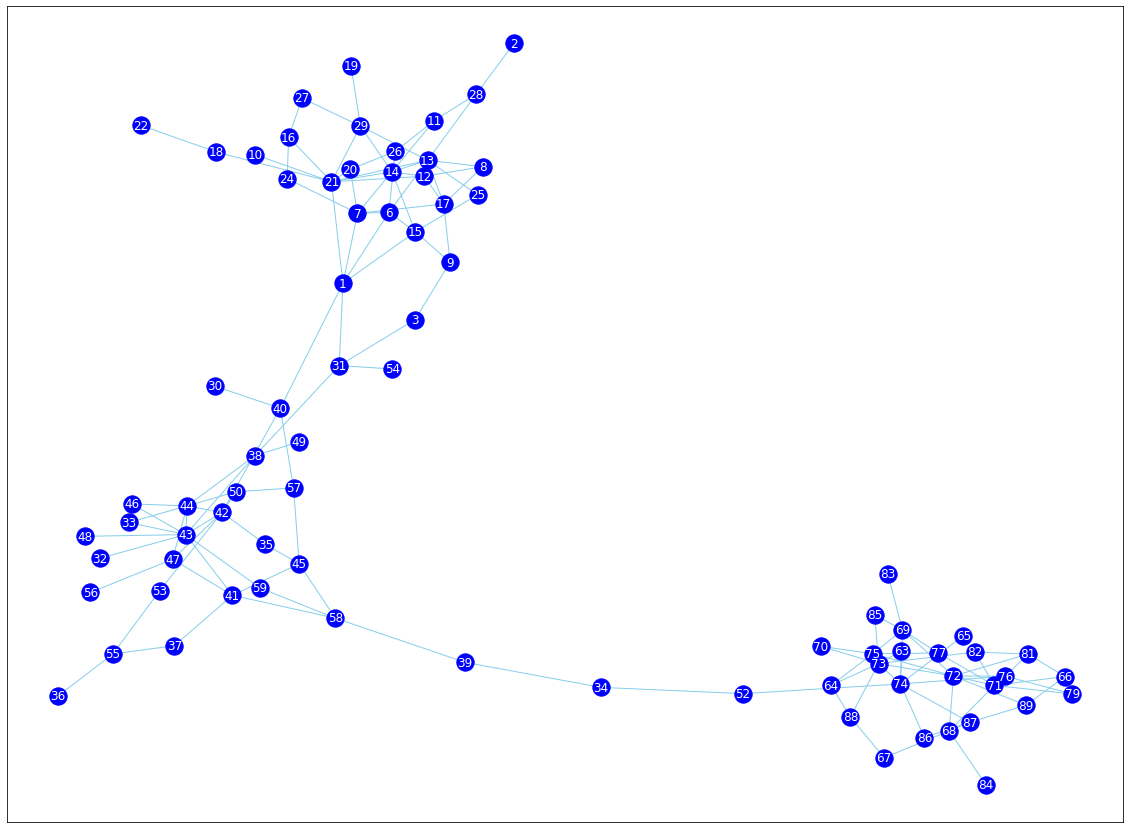

[[ 0.9888674  -0.4534044   0.1593654 ]
 [-0.05782271 -3.5999818  -3.4635792 ]
 [ 1.6543285  -0.38027823  0.06421719]
 [-0.11920871 -3.635243   -3.4098387 ]
 [-0.07383606 -3.3590136  -3.1817899 ]
 [-0.12469067 -3.536689   -3.3055165 ]
 [ 1.3900706  -0.4719461   0.312962  ]
 [ 1.2859553  -0.50075     0.34085268]
 [ 1.0608468  -0.42918554  0.1359856 ]
 [ 1.9258103  -0.92009056  1.0396909 ]
 [ 2.2734523  -0.68753374  0.6559714 ]
 [ 1.8105853  -0.4137662   0.09277245]
 [-0.03076276 -3.357015   -3.2570407 ]
 [-0.04946487 -3.3111725  -3.1862018 ]
 [ 1.6639762  -0.9022359   1.0323362 ]
 [ 2.6646535  -1.7611666   2.2905664 ]
 [ 0.09668951 -3.3664103  -3.4153242 ]
 [ 0.3782936  -0.9659015   0.88576305]
 [ 0.64006716 -0.54640245  0.30580232]
 [ 1.5305482  -0.7072727   0.7176009 ]
 [ 0.06197338 -1.1481425   0.85896236]
 [ 0.7607307  -0.7496358   0.6438959 ]
 [ 2.5954256  -1.8592789   2.4067583 ]
 [-0.10599589 -3.0937045  -2.8625405 ]
 [-0.04043962 -3.2147152  -3.1060624 ]
 [ 1.2381471  -0.28197467

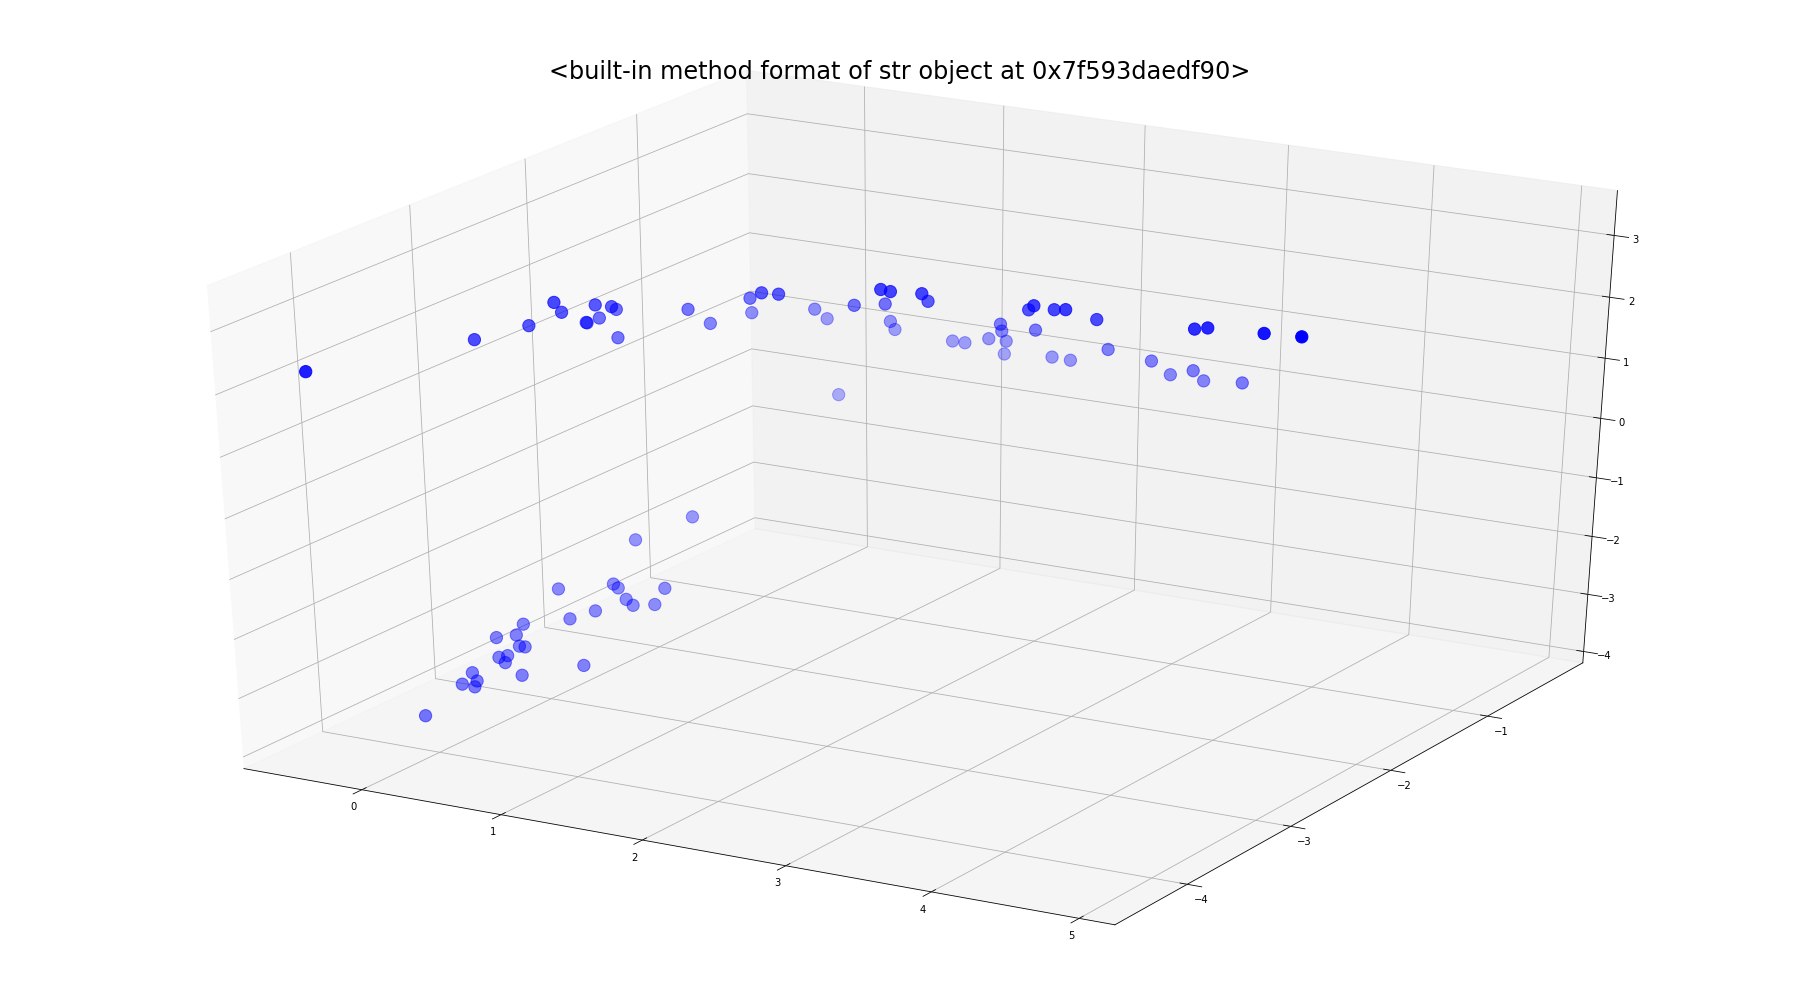

In [6]:
#### showing results of the random graphs by 'strength' of connections

# 1. weak group connection graph
graph50 = GraphGeneration(50)
graph_plot(graph50)
representation_create_and_plot(graph50)

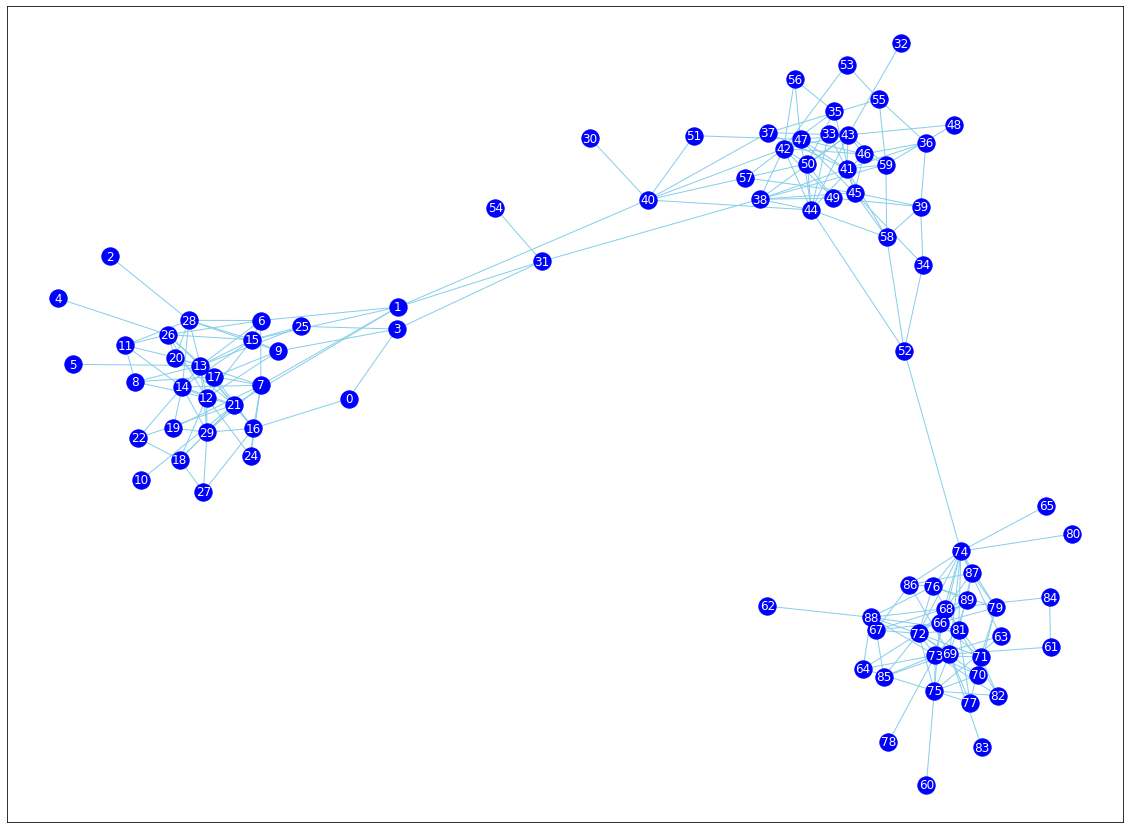

[[-3.5532184e+00 -8.9479554e-01 -8.8604760e-01]
 [-3.9810178e+00 -8.9934701e-01 -9.3433845e-01]
 [-1.2037491e+00 -6.8428807e-02  2.6582785e+00]
 [ 1.9971451e-01 -2.5781460e+00  5.6228507e-01]
 [ 2.2980887e-01 -2.7092888e+00  6.8707228e-01]
 [-7.8982794e-01 -2.3636380e-01  2.1694541e+00]
 [ 3.5176775e-01 -3.0057776e+00  1.0530279e+00]
 [-4.4836965e+00 -1.0452632e+00 -1.1003287e+00]
 [-1.0423542e+00 -1.5766500e-01  2.5697558e+00]
 [-7.8673828e-01 -3.3051363e-01  2.4097269e+00]
 [-3.5883205e+00 -9.2832631e-01 -9.3015277e-01]
 [-3.8737411e+00 -9.0448862e-01 -9.2819208e-01]
 [ 1.8068771e-01 -2.7285395e+00  5.8837956e-01]
 [-1.3898731e+00 -8.7265722e-02  3.1129286e+00]
 [-4.0473657e+00 -1.0305758e+00 -1.0446612e+00]
 [-3.9041739e+00 -8.9732069e-01 -9.2068648e-01]
 [-3.7707098e+00 -9.5925945e-01 -9.7750974e-01]
 [ 2.1718408e-01 -2.7966404e+00  6.3405949e-01]
 [ 2.7205187e-01 -1.8534849e+00  1.1318784e+00]
 [-1.8387308e+00  8.3951652e-02  3.5515625e+00]
 [-3.9346073e+00 -1.0088884e+00 -1.01045

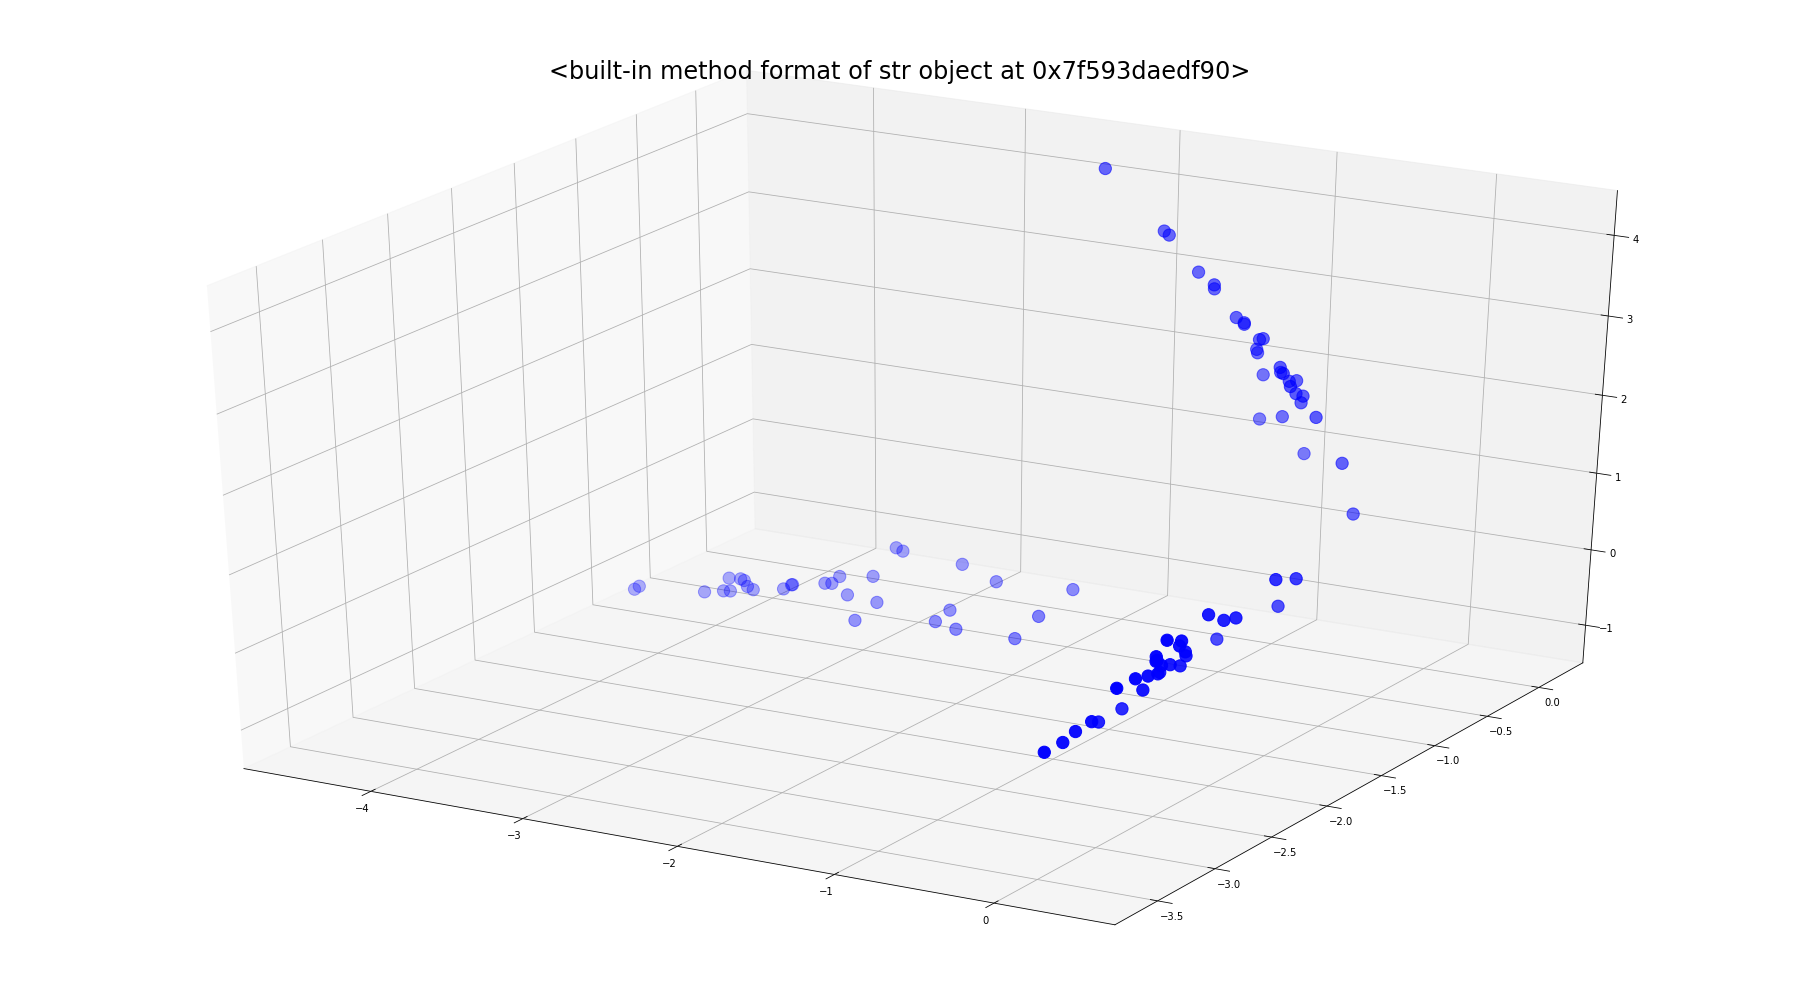

In [7]:
# 2. intermediate group connection graph
graph100 = GraphGeneration(100)
graph_plot(graph100)
representation_create_and_plot(graph100)

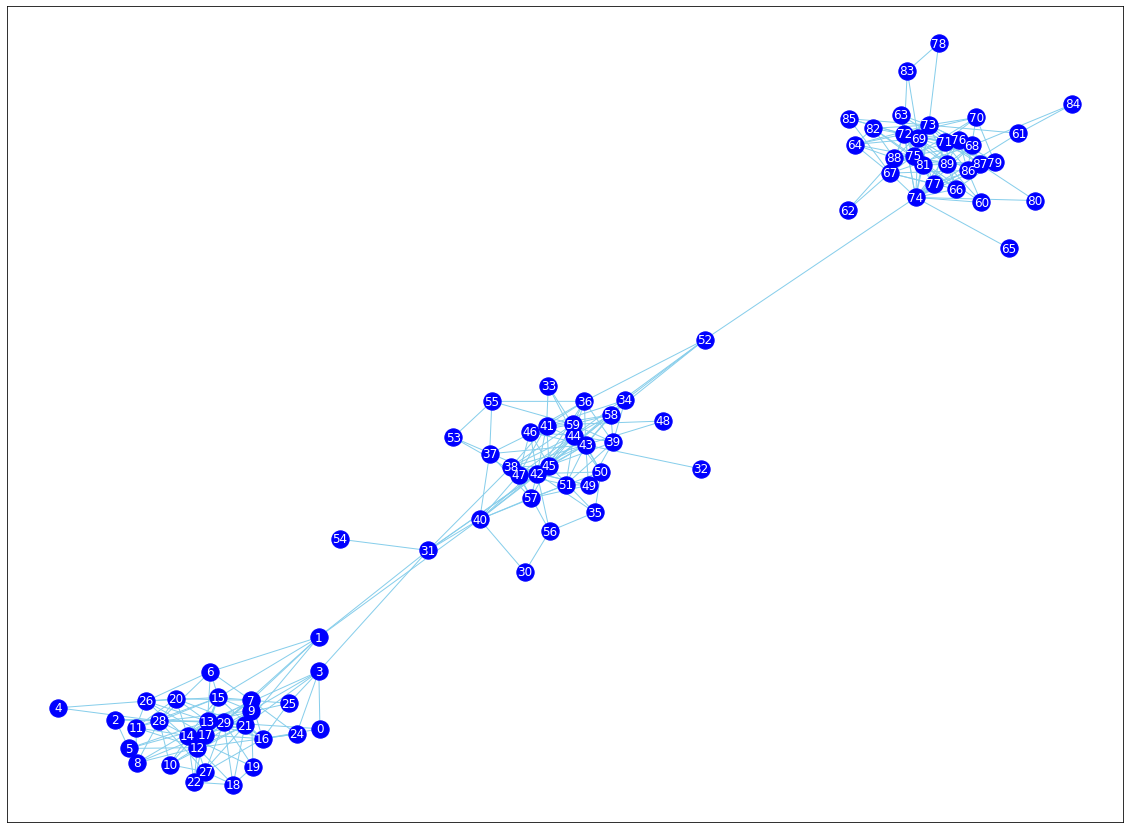

[[ 1.0044719  -2.2493157  -0.12864046]
 [ 1.2163478  -2.2724125  -0.573904  ]
 [ 0.96851265 -2.169382   -0.108914  ]
 [-1.841954   -0.43117434 -2.9494314 ]
 [-2.5090349  -2.0065851   0.8708998 ]
 [-1.7437063  -0.42729223 -2.7711053 ]
 [-1.9970099  -0.47785112 -3.4331653 ]
 [-1.979845   -0.46357897 -3.300538  ]
 [ 1.1887174  -2.217432   -0.55165756]
 [ 1.1041576  -2.13548    -0.4037563 ]
 [-1.6915777  -0.4241598  -2.7601323 ]
 [-2.083233   -1.7894949   0.8116609 ]
 [-1.7417617  -0.4335393  -2.906162  ]
 [-2.150527   -1.8327066   0.8319859 ]
 [-1.9039334  -1.6408474   0.7427017 ]
 [-1.8088337  -1.6772455   0.7875209 ]
 [-1.8024836  -0.43606237 -3.008948  ]
 [ 1.1087141  -2.1944513  -0.3964834 ]
 [-2.0544395  -1.7954241   0.8150373 ]
 [-1.7296154  -0.40051118 -2.6607397 ]
 [-1.979653   -1.7737871   0.82289314]
 [-1.9879444  -1.6909349   0.7424059 ]
 [-1.67862    -0.467988   -2.9863245 ]
 [-1.7142429  -0.40681872 -2.781276  ]
 [-1.858869   -0.44229206 -3.0185926 ]
 [ 0.9627472  -2.1754124 

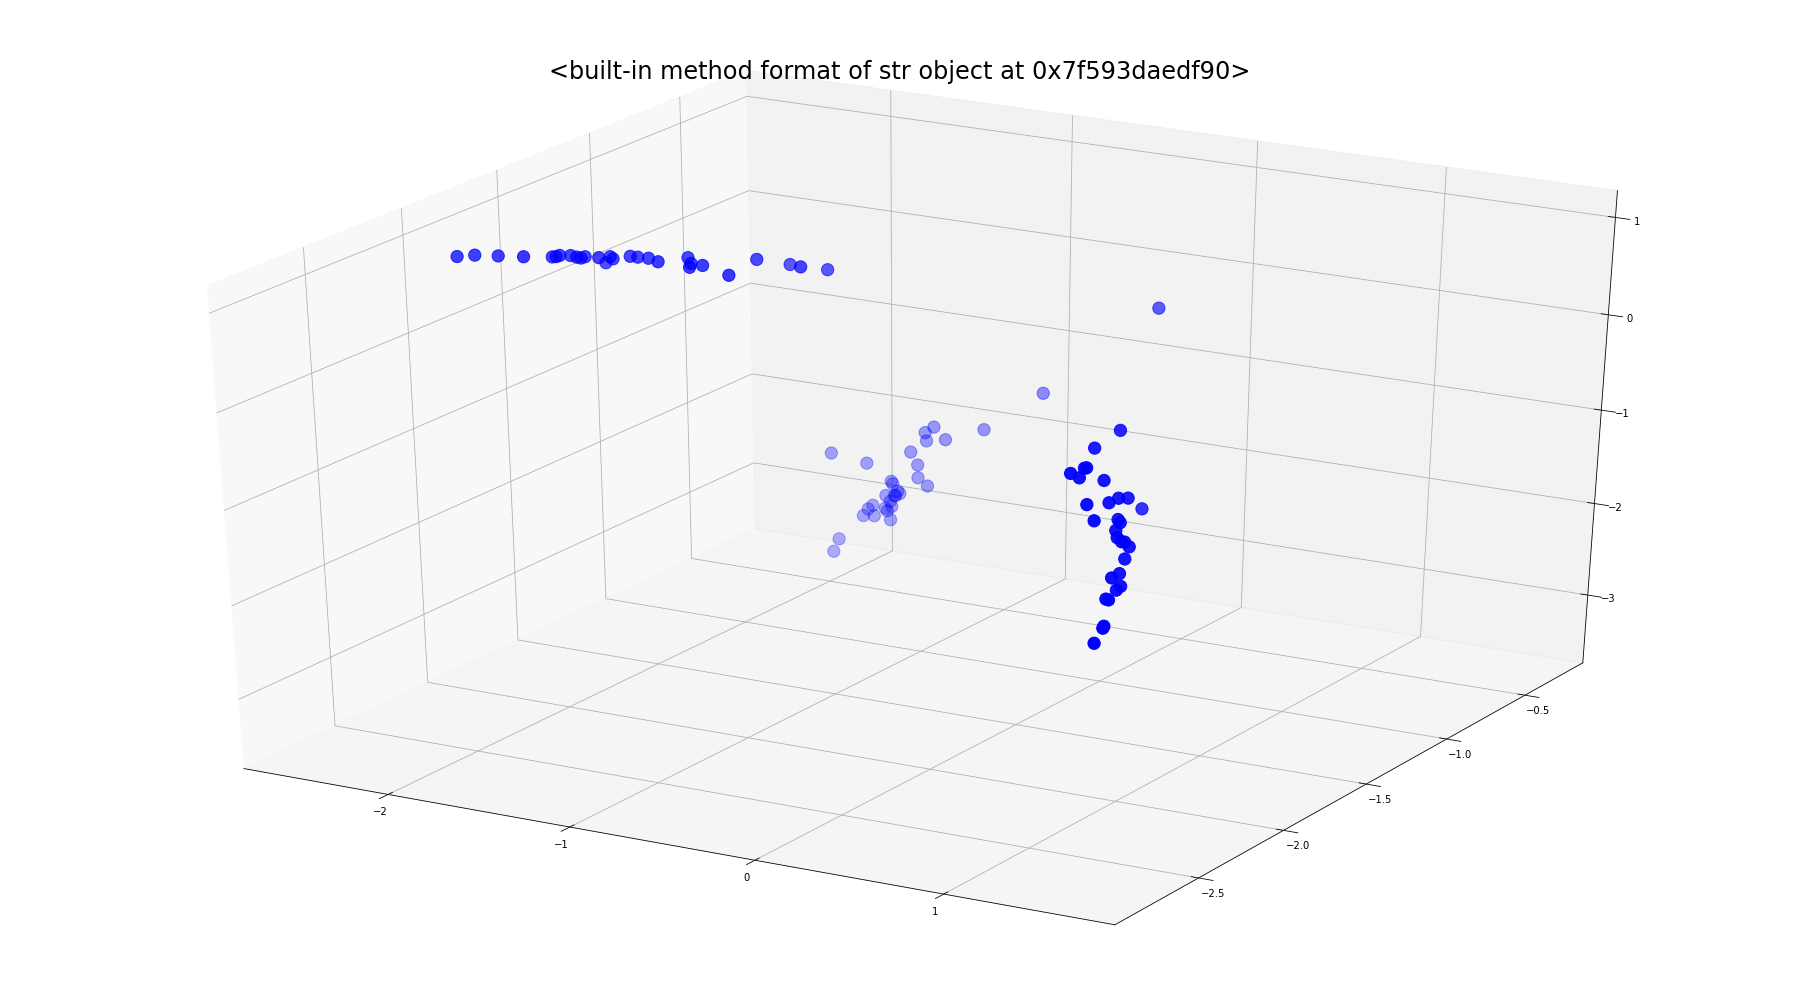

In [8]:
# 3. strong group connection graph
graph150 = GraphGeneration(150)
graph_plot(graph150)
representation_create_and_plot(graph150)